In [9]:
import pandas as pd

# Load the data from a CSV (assuming the file is in CSV format)
# Since I don't have access to the exact format of your file, let's assume it's uploaded and ready for use

# Mock loading a file (replace with actual file path if needed)
file_path = '/Users/aditya/Desktop/HAB/HAB Report/HAB Data Download (2021-2023).csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Show the first few rows of the dataset to get an idea of its structure
df.head()


,Site Visit Date and Time,What group visited the site (pick one),Waterbody name,Site ID and/or site description,Algal Bloom Observed?,Sample Taken?,Algal ID from HAB Label,Fluorosense (µg/L),Water Temp - Celcius,Depth of sample,...,anatoxin,saxitoxin,phyco_ugl,phyco_A,chl_B,habstatus,advisorytier,bathbeach,x,y
0,"5/19/2021, 11:48 AM",Other. See Comment,Mountain Lake,Mid station,No,Yes,2423.0,6.0,NaN,0.1,...,NaN,0.02,NaN,38.69,6.450,NaN,Advisory,no,-74.983983,40.859302
1,"5/19/2021, 11:56 AM",Other. See Comment,Mountain Lake,South station,No,Yes,2422.0,7.0,NaN,0.1,...,NaN,0.02,NaN,41.95,5.462,NaN,Advisory,no,-74.985765,40.856036
2,"5/19/2021, 11:59 AM",Other. See Comment,Mountain Lake,Dock station,No,Yes,2421.0,7.0,NaN,0.1,...,NaN,0.02,NaN,31.08,6.157,NaN,Advisory,no,-74.987139,40.859223
3,"5/19/2021, 12:00 PM",Other. See Comment,Mountain Lake,North station,No,Yes,2424.0,7.0,NaN,0.1,...,NaN,0.02,NaN,23.73,5.931,NaN,Advisory,no,-74.983353,40.862566
4,"5/20/2021, 1:36 PM",DEP-BFBM,Rosedale Lake,Northside of fishing dock,Yes,Yes,2179.0,74.0,25.9,0.1,...,NaN,NaN,NaN,153.60,7.225,NaN,Watch,N?A,-74.757452,40.330902


In [3]:
# Step 1: Ensure the "Site Visit Date and Time" column is in datetime format and extract the year
df['Site Visit Date and Time'] = pd.to_datetime(df['Site Visit Date and Time'])
df['Year'] = df['Site Visit Date and Time'].dt.year

# Step 2: Create the Pivot Table
# We will group by 'Year' and display the count of records for each 'advisorytier'
pivot_table = pd.pivot_table(df, 
                             values='Water Temp - Celcius',  # Can replace with another metric
                             index='Year', 
                             columns='advisorytier', 
                             aggfunc='count')  # Aggregation function (e.g., 'count' or 'mean')

# Display the pivot table
pivot_table


advisorytier,Advisory,HAB Not Present,Warning,Watch
Year,,,,
2021,34,73,0,58
2022,79,102,6,47
2023,91,213,4,62


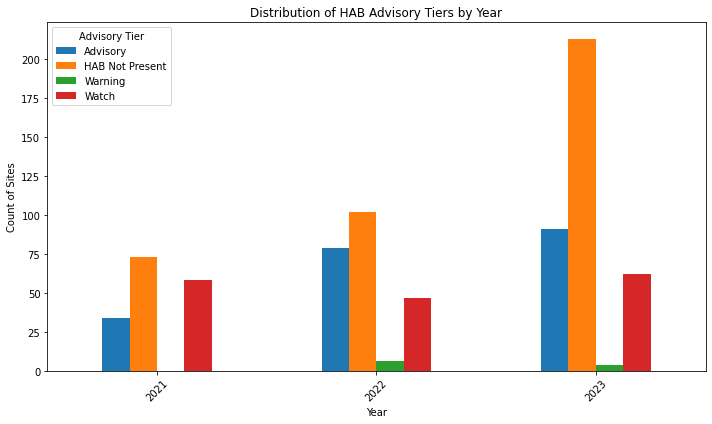

In [4]:
import matplotlib.pyplot as plt

# Plotting the pivot table as a bar plot to visualize the distribution of advisory tiers by year
pivot_table.plot(kind='bar', figsize=(10, 6))

# Adding labels and title to the plot
plt.title('Distribution of HAB Advisory Tiers by Year')
plt.xlabel('Year')
plt.ylabel('Count of Sites')
plt.xticks(rotation=45)
plt.legend(title='Advisory Tier')

# Show the plot
plt.tight_layout()
plt.show()


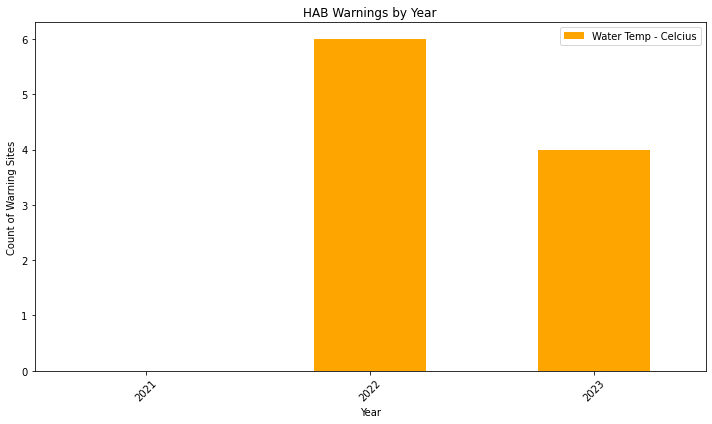

In [5]:
# Step 1: Filter data where advisorytier is a warning (assuming 'Warning' is one of the values in 'advisorytier')
warning_df = df[df['advisorytier'] == 'Warning']  # Replace 'Warning' with the actual warning category in your dataset

# Step 2: Create a pivot table to count the number of warnings per year
warning_pivot = pd.pivot_table(warning_df, 
                               values='Water Temp - Celcius',  # Replace with any relevant column
                               index='Year', 
                               aggfunc='count', 
                               fill_value=0)

# Step 3: Plot the warnings over the years
warning_pivot.plot(kind='bar', figsize=(10, 6), color='orange')

# Adding labels and title to the plot
plt.title('HAB Warnings by Year')
plt.xlabel('Year')
plt.ylabel('Count of Warning Sites')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()



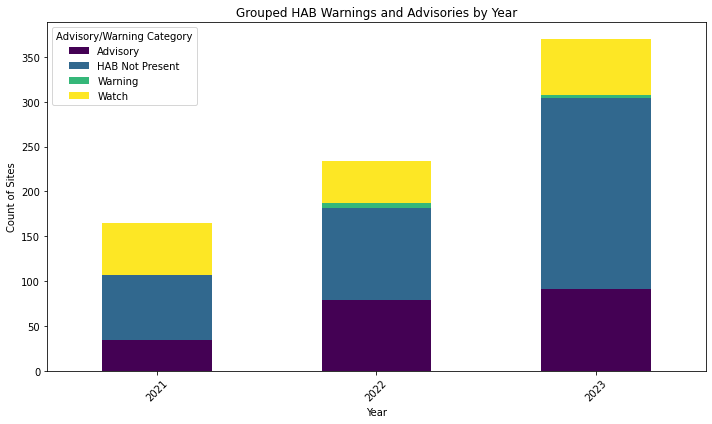

In [6]:
# Step 1: Combine 'warning' and 'advisory' categories into a single category
df['Advisory_Warning_Group'] = df['advisorytier'].replace({
    'warning_category1': 'Warning',   # Replace with actual warning/advisory tier names
    'warning_category2': 'Warning',
    'advisory_category1': 'Advisory',
    'advisory_category2': 'Advisory',
})

# Step 2: Create a pivot table with the new grouped advisory/warning categories
pivot_grouped = pd.pivot_table(df, 
                               values='Water Temp - Celcius',  # Can replace with another value if preferred
                               index='Year', 
                               columns='Advisory_Warning_Group', 
                               aggfunc='count', 
                               fill_value=0)

# Step 3: Plot the grouped data as a stacked bar plot
pivot_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), colormap="viridis")

# Adding labels and title to the plot
plt.title('Grouped HAB Warnings and Advisories by Year')
plt.xlabel('Year')
plt.ylabel('Count of Sites')
plt.xticks(rotation=45)
plt.legend(title='Advisory/Warning Category')

# Show the plot
plt.tight_layout()
plt.show()


In [7]:
# Fill NaN values with 0 before converting to int
df['toxinpresent'] = df['toxinpresent'].fillna(0).astype(int)

# Now proceed with the scatter plot
axs[1, 1].scatter(df['Year'], df['toxinpresent'], s=50, alpha=0.7)
axs[1, 1].set_title('Year vs Toxin Present')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Toxin Present (Count)')


NameError: name 'axs' is not defined

In [9]:
# Drop rows where toxinpresent is NaN
df_clean = df.dropna(subset=['toxinpresent'])

# Now proceed with the scatter plot
axs[1, 1].scatter(df_clean['Year'], df_clean['toxinpresent'].astype(int), s=50, alpha=0.7)
axs[1, 1].set_title('Year vs Toxin Present')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Toxin Present (Count)')


Text(513.8250000000002, 0.5, 'Toxin Present (Count)')

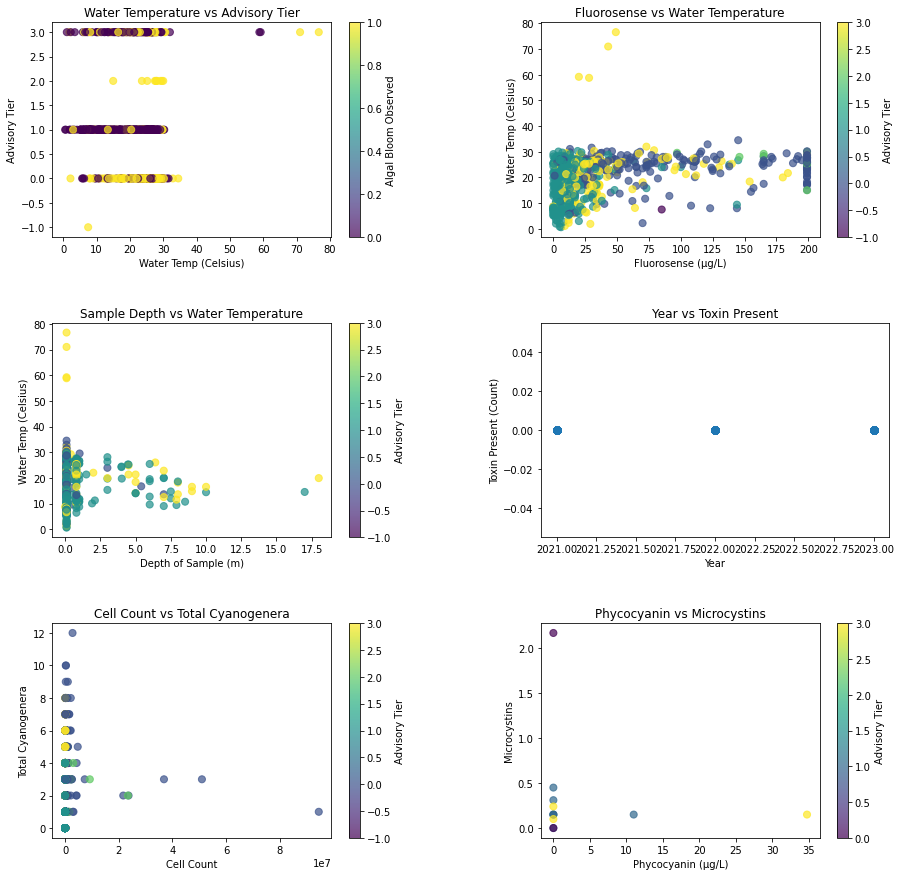

In [10]:
import matplotlib.pyplot as plt

# Setting up the figure to accommodate multiple plots
fig, axs = plt.subplots(3, 2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Scatter plot 1: Water Temperature vs. Advisory Tier
axs[0, 0].scatter(df['Water Temp - Celcius'], df['advisorytier'].astype('category').cat.codes, c=df['Algal Bloom Observed?'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
axs[0, 0].set_title('Water Temperature vs Advisory Tier')
axs[0, 0].set_xlabel('Water Temp (Celsius)')
axs[0, 0].set_ylabel('Advisory Tier')
axs[0, 0].colorbar = fig.colorbar(axs[0, 0].collections[0], ax=axs[0, 0], label='Algal Bloom Observed')

# Scatter plot 2: Fluorosense vs. Water Temperature
axs[0, 1].scatter(df['Fluorosense (µg/L)'], df['Water Temp - Celcius'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
axs[0, 1].set_title('Fluorosense vs Water Temperature')
axs[0, 1].set_xlabel('Fluorosense (µg/L)')
axs[0, 1].set_ylabel('Water Temp (Celsius)')
axs[0, 1].colorbar = fig.colorbar(axs[0, 1].collections[0], ax=axs[0, 1], label='Advisory Tier')

# Scatter plot 3: Sample Depth vs. Water Temperature
axs[1, 0].scatter(df['Depth of sample'], df['Water Temp - Celcius'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
axs[1, 0].set_title('Sample Depth vs Water Temperature')
axs[1, 0].set_xlabel('Depth of Sample (m)')
axs[1, 0].set_ylabel('Water Temp (Celsius)')
axs[1, 0].colorbar = fig.colorbar(axs[1, 0].collections[0], ax=axs[1, 0], label='Advisory Tier')

# Scatter plot 4: Year vs Toxin Present
axs[1, 1].scatter(df['Year'], df['toxinpresent'].astype(int), s=50, alpha=0.7)
axs[1, 1].set_title('Year vs Toxin Present')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Toxin Present (Count)')

# Scatter plot 5: Cell Count vs Total Cyanogenera
axs[2, 0].scatter(df['cellct'], df['totalcyanogenera'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
axs[2, 0].set_title('Cell Count vs Total Cyanogenera')
axs[2, 0].set_xlabel('Cell Count')
axs[2, 0].set_ylabel('Total Cyanogenera')
axs[2, 0].colorbar = fig.colorbar(axs[2, 0].collections[0], ax=axs[2, 0], label='Advisory Tier')

# Scatter plot 6: Phycocyanin vs Microcystins
axs[2, 1].scatter(df['phyco_ugl'], df['microcystins'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
axs[2, 1].set_title('Phycocyanin vs Microcystins')
axs[2, 1].set_xlabel('Phycocyanin (µg/L)')
axs[2, 1].set_ylabel('Microcystins')
axs[2, 1].colorbar = fig.colorbar(axs[2, 1].collections[0], ax=axs[2, 1], label='Advisory Tier')

# Display the plots
plt.show()


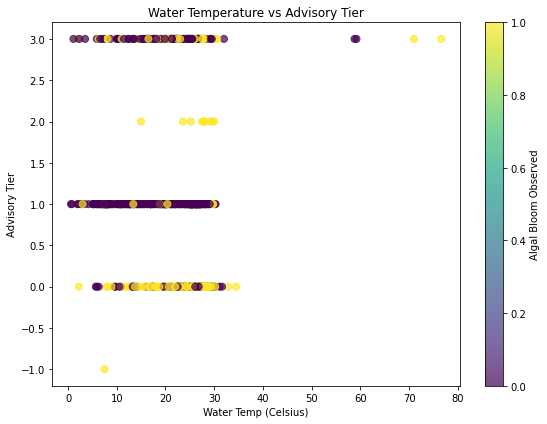

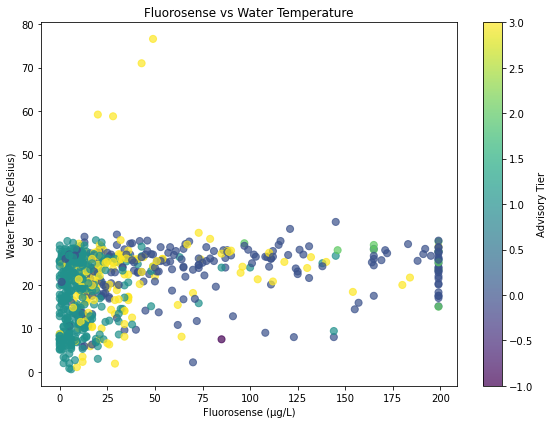

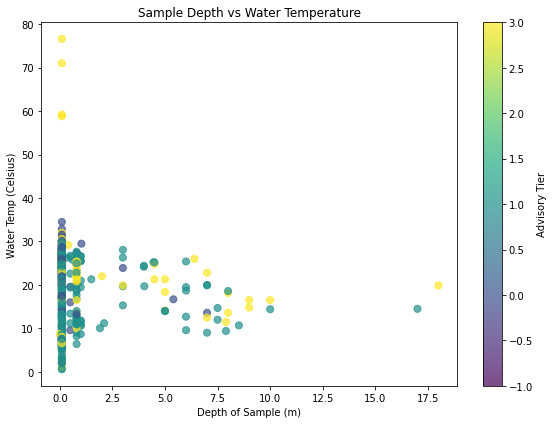

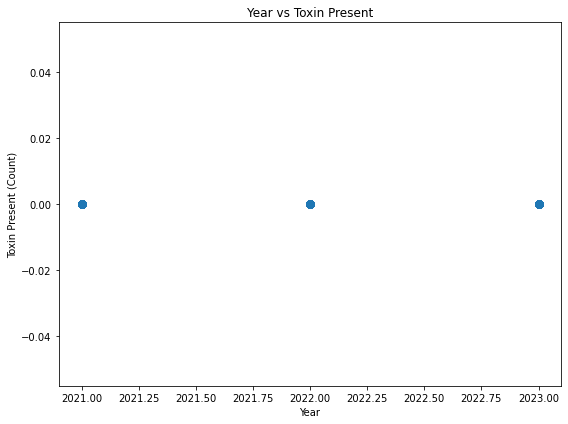

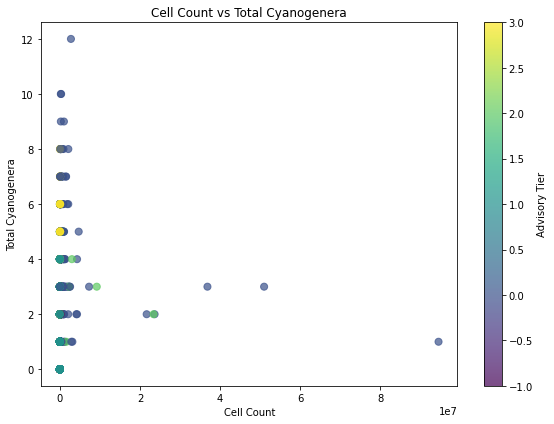

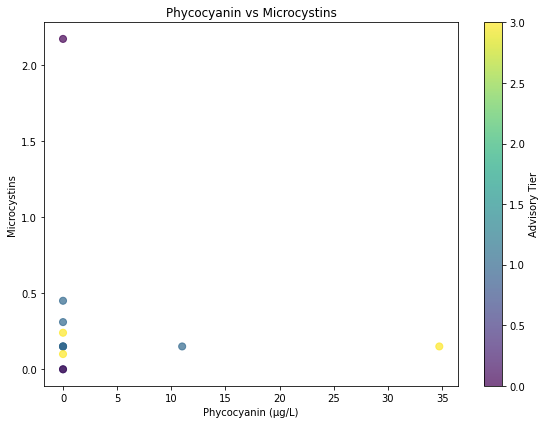

In [11]:
# Individual scatter plot 1: Water Temperature vs Advisory Tier
plt.figure(figsize=(8,6))
plt.scatter(df['Water Temp - Celcius'], df['advisorytier'].astype('category').cat.codes, c=df['Algal Bloom Observed?'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
plt.title('Water Temperature vs Advisory Tier')
plt.xlabel('Water Temp (Celsius)')
plt.ylabel('Advisory Tier')
plt.colorbar(label='Algal Bloom Observed')
plt.tight_layout()
plt.show()

# Individual scatter plot 2: Fluorosense vs Water Temperature
plt.figure(figsize=(8,6))
plt.scatter(df['Fluorosense (µg/L)'], df['Water Temp - Celcius'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
plt.title('Fluorosense vs Water Temperature')
plt.xlabel('Fluorosense (µg/L)')
plt.ylabel('Water Temp (Celsius)')
plt.colorbar(label='Advisory Tier')
plt.tight_layout()
plt.show()

# Individual scatter plot 3: Sample Depth vs Water Temperature
plt.figure(figsize=(8,6))
plt.scatter(df['Depth of sample'], df['Water Temp - Celcius'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
plt.title('Sample Depth vs Water Temperature')
plt.xlabel('Depth of Sample (m)')
plt.ylabel('Water Temp (Celsius)')
plt.colorbar(label='Advisory Tier')
plt.tight_layout()
plt.show()

# Individual scatter plot 4: Year vs Toxin Present
# Handling NaN in toxinpresent by filling with 0
df['toxinpresent'] = df['toxinpresent'].fillna(0).astype(int)
plt.figure(figsize=(8,6))
plt.scatter(df['Year'], df['toxinpresent'], s=50, alpha=0.7)
plt.title('Year vs Toxin Present')
plt.xlabel('Year')
plt.ylabel('Toxin Present (Count)')
plt.tight_layout()
plt.show()

# Individual scatter plot 5: Cell Count vs Total Cyanogenera
plt.figure(figsize=(8,6))
plt.scatter(df['cellct'], df['totalcyanogenera'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
plt.title('Cell Count vs Total Cyanogenera')
plt.xlabel('Cell Count')
plt.ylabel('Total Cyanogenera')
plt.colorbar(label='Advisory Tier')
plt.tight_layout()
plt.show()

# Individual scatter plot 6: Phycocyanin vs Microcystins
plt.figure(figsize=(8,6))
plt.scatter(df['phyco_ugl'], df['microcystins'], c=df['advisorytier'].astype('category').cat.codes, cmap='viridis', s=50, alpha=0.7)
plt.title('Phycocyanin vs Microcystins')
plt.xlabel('Phycocyanin (µg/L)')
plt.ylabel('Microcystins')
plt.colorbar(label='Advisory Tier')
plt.tight_layout()
plt.show()


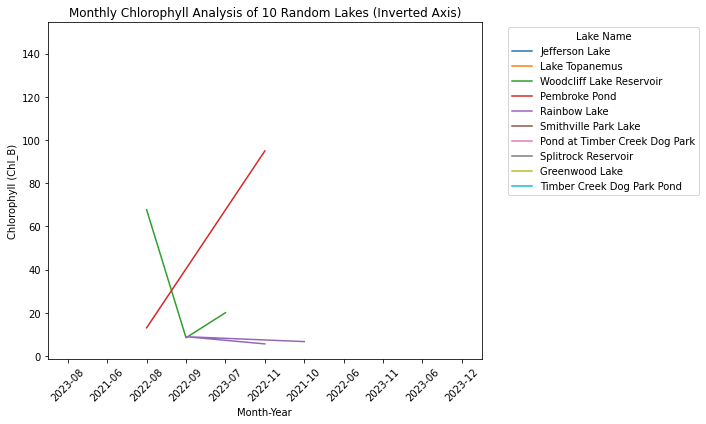

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Ensure the "Site Visit Date and Time" column is in datetime format and extract the month-year
df['Site Visit Date and Time'] = pd.to_datetime(df['Site Visit Date and Time'])
df['Month-Year'] = df['Site Visit Date and Time'].dt.to_period('M')

# Step 2: Randomly select 10 lakes from the data (assuming 'Waterbody name' refers to lakes)
random_lakes = df['Waterbody name'].dropna().unique()
random_lakes_sample = np.random.choice(random_lakes, size=10, replace=False)

# Step 3: Filter the data to only include the selected 10 lakes
df_random_lakes = df[df['Waterbody name'].isin(random_lakes_sample)]

# Step 4: Plot chlorophyll (assuming 'chl_B' refers to chlorophyll data) vs Month-Year for the 10 lakes (with inverted axes and line plot)
plt.figure(figsize=(10, 6))

for lake in random_lakes_sample:
    lake_data = df_random_lakes[df_random_lakes['Waterbody name'] == lake]
    plt.plot(lake_data['Month-Year'].astype(str), lake_data['chl_B'], label=lake)

# Adding labels and title
plt.title('Monthly Chlorophyll Analysis of 10 Random Lakes (Inverted Axis)')
plt.ylabel('Chlorophyll (Chl_B)')
plt.xlabel('Month-Year')
plt.xticks(rotation=45)
plt.legend(title='Lake Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


/var/folders/f3/ngl4f6sj0kbdxphth1sf8hfw0000gn/T/ipykernel_45190/1198714334.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


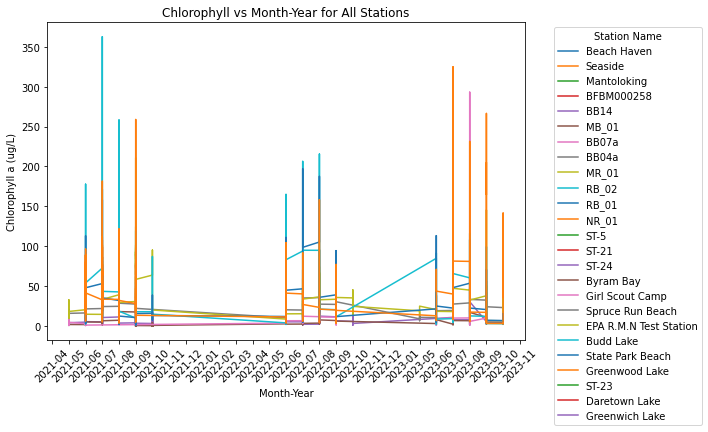

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data from the specified file path
file_path = '/Users/aditya/Desktop/HAB/Water/continuous_20240917.csv'
df = pd.read_csv(file_path)

# Step 2: Ensure the "Date_Time" column is in datetime format and extract the month-year
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month-Year'] = df['Date_Time'].dt.to_period('M')

# Step 3: Plot chlorophyll ("Chlorophyll a ug/L") vs Month-Year for all stations (lakes)
plt.figure(figsize=(10, 6))

# Iterate through each unique station and plot
for station in df['Station'].unique():
    station_data = df[df['Station'] == station]
    plt.plot(station_data['Month-Year'].astype(str), station_data['Chlorophyll a ug/L'], label=station)

# Adding labels and title
plt.title('Chlorophyll vs Month-Year for All Stations')
plt.xlabel('Month-Year')
plt.ylabel('Chlorophyll a (ug/L)')
plt.xticks(rotation=45)
plt.legend(title='Station Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
df.head(100)

,Station,Huc14,Affiliation,StationType,Latitude,Longitude,County,Municipality,Date_Time,Date_Time_TZ,...,Specific Conductance mS/cm,Salinity ppt,% Dissolved Oxygen %,DO Concentration mg/L,Depth m,pH,Turbidity NTU,Chlorophyll a ug/L,Phycocyanin ug/L,Month-Year
0,Beach Haven,2040301140060,Barnegat Bay Partnership,Long-Term Offline,39.567079,-74.245045,OCEAN,Beach Haven Borough,2021-01-01 00:00:00,EST,...,44.24,28.03,106.5,11.21,NaN,8.08,13.44,NaN,NaN,2021-01
1,Seaside,2040301100040,Barnegat Bay Partnership,Long-Term Offline,39.921813,-74.082844,OCEAN,Seaside Park Borough,2021-01-01 00:00:00,EST,...,28.38,17.14,111.8,13.17,NaN,8.05,6.88,NaN,NaN,2021-01
2,Mantoloking,20403301050050,Barnegat Bay Partnership,Long-Term Offline,40.037400,-74.054050,OCEAN,Mantoloking Borough,2021-01-01 00:00:00,EST,...,33.02,20.32,109.1,12.20,NaN,8.07,3.90,NaN,NaN,2021-01
3,Beach Haven,2040301140060,Barnegat Bay Partnership,Long-Term Offline,39.567079,-74.245045,OCEAN,Beach Haven Borough,2021-01-01 00:15:00,EST,...,44.25,28.04,106.5,11.20,NaN,8.07,12.98,NaN,NaN,2021-01
4,Seaside,2040301100040,Barnegat Bay Partnership,Long-Term Offline,39.921813,-74.082844,OCEAN,Seaside Park Borough,2021-01-01 00:15:00,EST,...,28.38,17.14,111.7,13.17,NaN,8.05,6.34,NaN,NaN,2021-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mantoloking,20403301050050,Barnegat Bay Partnership,Long-Term Offline,40.037400,-74.054050,OCEAN,Mantoloking Borough,2021-01-01 07:45:00,EST,...,32.53,19.92,106.8,12.20,NaN,8.05,4.46,NaN,NaN,2021-01
96,Beach Haven,2040301140060,Barnegat Bay Partnership,Long-Term Offline,39.567079,-74.245045,OCEAN,Beach Haven Borough,2021-01-01 08:00:00,EST,...,44.19,27.90,102.5,11.01,NaN,8.05,13.74,NaN,NaN,2021-01
97,Seaside,2040301100040,Barnegat Bay Partnership,Long-Term Offline,39.921813,-74.082844,OCEAN,Seaside Park Borough,2021-01-01 08:00:00,EST,...,28.19,16.94,107.8,13.04,NaN,7.99,4.72,NaN,NaN,2021-01
98,Mantoloking,20403301050050,Barnegat Bay Partnership,Long-Term Offline,40.037400,-74.054050,OCEAN,Mantoloking Borough,2021-01-01 08:00:00,EST,...,32.74,20.07,106.6,12.14,NaN,8.05,4.53,NaN,NaN,2021-01


/var/folders/f3/ngl4f6sj0kbdxphth1sf8hfw0000gn/T/ipykernel_67222/1835465269.py:7: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


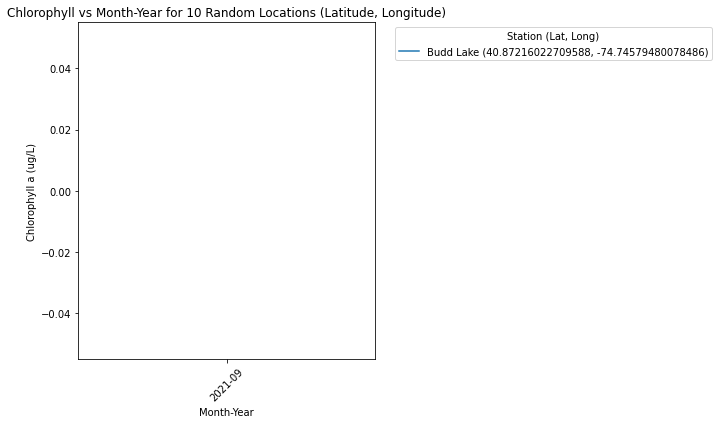

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the data from the specified file path
file_path = '/Users/aditya/Desktop/HAB/Water/continuous_20240917.csv'
df = pd.read_csv(file_path)

# Step 2: Ensure the "Date_Time" column is in datetime format and extract the month-year
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df['Month-Year'] = df['Date_Time'].dt.to_period('M')

# Step 3: Create a unique identifier for Latitude and Longitude combinations
df['Location'] = df['Latitude'].astype(str) + ', ' + df['Longitude'].astype(str)

# Step 4: Randomly select 10 unique locations based on Latitude and Longitude
random_locations = np.random.choice(df['Location'].unique(), size=1, replace=False)

# Step 5: Plot chlorophyll ("Chlorophyll a ug/L") vs Month-Year for these 10 random locations
plt.figure(figsize=(10, 6))

for location in random_locations:
    location_data = df[df['Location'] == location]
    # Create a label that includes the station name, latitude, and longitude
    label = f"{location_data['Station'].iloc[0]} ({location_data['Latitude'].iloc[0]}, {location_data['Longitude'].iloc[0]})"
    plt.plot(location_data['Month-Year'].astype(str), location_data['Chlorophyll a ug/L'], label=label)

# Adding labels and title
plt.title('Chlorophyll vs Month-Year for 10 Random Locations (Latitude, Longitude)')
plt.xlabel('Month-Year')
plt.ylabel('Chlorophyll a (ug/L)')
plt.xticks(rotation=45)
plt.legend(title='Station (Lat, Long)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
from sklearn.cluster import DBSCAN
import numpy as np

# Step 1: Perform clustering on latitude and longitude
coords = df[['Latitude', 'Longitude']].values
db = DBSCAN(eps=0.01, min_samples=3).fit(coords)  # eps defines how close points should be to form a cluster

# Step 2: Add cluster labels to the DataFrame
df['Lake'] = db.labels_

# Step 3: Map cluster labels to lake names (optional, for better readability)
# You can manually map the cluster labels (0, 1, 2, etc.) to actual lake names if needed
cluster_to_lake = {
    0: 'Lake A',
    1: 'Lake B',
    # Add more mappings here if needed
}

df['Lake'] = df['Lake'].map(cluster_to_lake).fillna('Unknown Lake')

# Step 4: Plot the chlorophyll levels for each lake
plt.figure(figsize=(10, 6))

for lake in df['Lake'].unique():
    lake_data = df[df['Lake'] == lake]
    plt.plot(lake_data['Month-Year'].astype(str), lake_data['Chlorophyll a ug/L'], label=lake)

plt.title('Chlorophyll vs Month-Year for Clustered Lakes')
plt.xlabel('Month-Year')
plt.ylabel('Chlorophyll a (ug/L)')
plt.xticks(rotation=45)
plt.legend(title='Lake Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


: 